### 텍스트 데이터 수집 및 워드 클라우드 생성
- 개별과제
    - 네이버 브랜드 스토어의 상품 리뷰 데이터 수집
    - 그 외 관심있는 텍스트 데이터 수집
    - 환경: 개인 PC 주피터 노트북에서 진행

- 조별과제
    - 워드 클라우드 만들기
    - 수집한 텍스트 데이터에 대한 형태소 분석: 자유롭게 EDA 수행
    - 환경: 구글 colab

In [58]:
# 개별 과제: 네이버 브랜드 스토어 상품 리뷰 데이터 수집
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

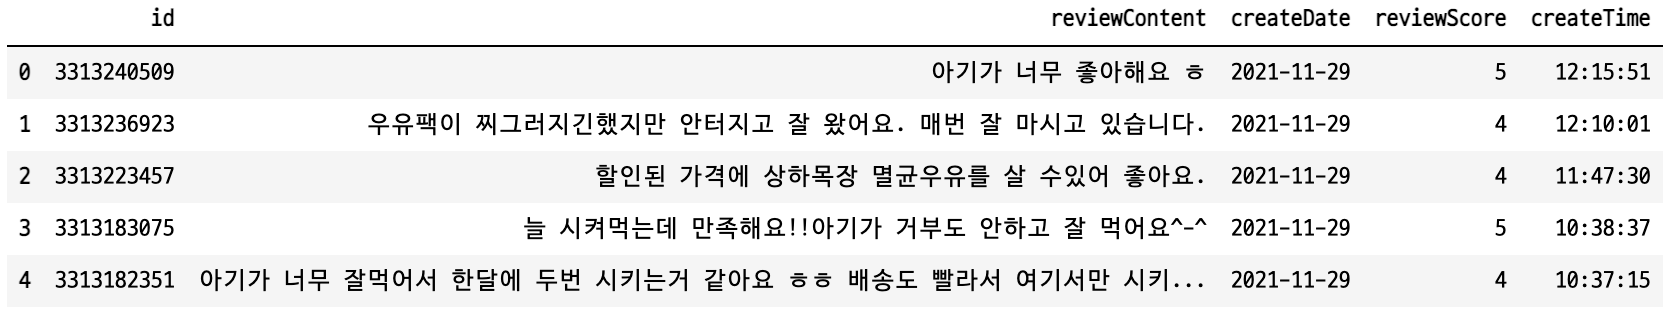

In [ ]:
from IPython.display import Image
Image("imgs/wc_1.png")

In [ ]:
# 조별 과제: 추가적인 텍스트 데이터 수집 + 워드 클라우드 만들기 & 형태소 분석 또는 EDA

<img src="imgs/wc_2.png" width="400px;" style="float:left;">

In [ ]:
# ex) 상하목장 우유는 아이가 주로 소비하고 유기농 멸균 우유라는 것이 이유인 것 같다
# ex) 네이버 스마트 스토어는 주로 택배로 받기 위한 주문이 많다

#### 매일유업 소화가 잘되는 우유

In [54]:
# 랭킹순/최신순/평점 높은순/평점 낮은순
# REVIEW_RANKING/CREATE_DATE_DESC/REVIEW_SCORE_DESC/REVIEW_SCORE_ASC
# sortType 제거할 경우 최신 댓글순
url = "https://brand.naver.com/n/v1/reviews/paged-reviews?page=1&pageSize=30&merchantNo=510133398&originProductNo=5320357810&sortType=REVIEW_RANKING"
response = requests.get(url)
response

<Response [200]>

In [55]:
response.text[:500]

'{"contents":[{"id":"3372221063","reviewServiceType":"SELLBLOG","reviewType":"NORMAL","reviewContentClassType":"PHOTO","reviewContent":"맛있어요\\n어느날부턴가 \'유당불내증\'\\n하지만 소잘 우유 덕분에 맛있는 날이 계속입니다\\n서울에선 6개씩 묶음 4개 박스인거였는데\\n시골이라 그런가 통으로 한박스인게, 큰 박스에 담겨왔네요. 비닐이 적어져서 더 좋습니다\\n소잘우유도 빨대없는 버전 나오면 좋겠어요","createDate":"2022-02-21T01:36:39.229+0000","reviewDisplayStatusType":"NORMAL","repurchase":false,"reviewScore":5,"reviewRankingScore":-71.5965,"writerMemberId":"myzu****","writerMemberIdNo":"","writerMemberNo":0,"wri'

In [56]:
data = response.json()["contents"]
columns = ["id", "reviewContent", "createDate", "reviewScore"]
review_df = pd.DataFrame(data)[columns]
review_df.head()

,id,reviewContent,createDate,reviewScore
0,3372221063,맛있어요\n어느날부턴가 '유당불내증'\n하지만 소잘 우유 덕분에 맛있는 날이 계속입...,2022-02-21T01:36:39.229+0000,5
1,3372628245,항상 냉장고에 안떨어지게 넣어두는데 배도 안아프고 한번 먹기에 양도 딱 적당해서 좋...,2022-02-21T11:51:20.289+0000,5
2,3368381118,매일 마십니다 그래서 매일꺼를...ㅋㅋ\n배속이 편하니 손에 집히는데로\n목이마를때...,2022-02-15T15:12:27.646+0000,4
3,3369343213,매일 소화가 잘되는 우유 믿고 마십니딘. 유당 불내증이 있어 단백질 풍부한 우유를 ...,2022-02-17T00:54:01.746+0000,5
4,3374489210,쿠키가 너무 잘먹어요 옴뇸뇸 강아지전용 우유 먹으면 잘 토했는데 이건 먹어도 괜찮아...,2022-02-24T01:02:48.412+0000,5


In [57]:
len(review_df)

30

In [51]:
reviews = pd.DataFrame()

def maeil_review2(type="REVIEW_RANKING", page=1):
    url=f"https://brand.naver.com/n/v1/reviews/paged-reviews?page={page}&pageSize=30&merchantNo=510133398&originProductNo=5320357810&sortType={type}"
    response = requests.get(url)
    data = response.json()
    data = data["contents"]
    return pd.DataFrame(data)[["id", "reviewContent", "createDate", "reviewScore"]]

In [52]:
for i in range(1,750):
    if(i%10==0):
        print('/',end="")
        time.sleep(1)
    df = maeil_review2("REVIEW_RANKING",i)
    reviews = pd.concat((reviews, df), ignore_index=True, sort=False)

reviews

//////////////////////////////////////////////////////////////////////////

,id,reviewContent,createDate,reviewScore
0,3372221063,맛있어요\n어느날부턴가 '유당불내증'\n하지만 소잘 우유 덕분에 맛있는 날이 계속입...,2022-02-21T01:36:39.229+0000,5
1,3372628245,항상 냉장고에 안떨어지게 넣어두는데 배도 안아프고 한번 먹기에 양도 딱 적당해서 좋...,2022-02-21T11:51:20.289+0000,5
2,3368381118,매일 마십니다 그래서 매일꺼를...ㅋㅋ\n배속이 편하니 손에 집히는데로\n목이마를때...,2022-02-15T15:12:27.646+0000,4
3,3369343213,매일 소화가 잘되는 우유 믿고 마십니딘. 유당 불내증이 있어 단백질 풍부한 우유를 ...,2022-02-17T00:54:01.746+0000,5
4,3374489210,쿠키가 너무 잘먹어요 옴뇸뇸 강아지전용 우유 먹으면 잘 토했는데 이건 먹어도 괜찮아...,2022-02-24T01:02:48.412+0000,5
...,...,...,...,...
22457,3236234854,늘 주문하는 매일우유입니다\n포장꼼꼼하니 좋아요 \n2박스 추가 주문하러왔어요,2021-08-08T02:26:54.096+0000,5
22458,3220828727,한번 먹고나면 다른우유 못먹습니다.,2021-07-17T11:11:13.900+0000,5
22459,3219851713,정말 맛있네여 하나씩 빼서먹기 조아요^^,2021-07-16T06:46:16.193+0000,5
22460,3205101087,착한 회사 우유 많이 사먹을래요,2021-06-25T09:17:35.121+0000,5


In [72]:
# 추가 분석: 네이버 랭킹뉴스 기사 제목 크롤링
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

date = '20220224'
url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={date}'
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)
req = Request(news_url, headers={'User-Agent': 'Yeti'})
html = urlopen(req).read()

In [73]:
soup = BeautifulSoup(html, 'html.parser')
soup


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="telephone=no" name="format-detection">
<meta content="네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/home.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x

In [75]:
news_title = soup.select('div.rankingnews_box > ul > li > div > a')
news_title[3].string

'인텔, 노트북용 12세대 P/U 프로세서 10종 투입'

In [78]:
news_title

[<a class="list_title nclicks('RBP.rnknws')" href="https://n.news.naver.com/article/092/0002248516?ntype=RANKING">'스텔스' 오미크론 확산…전파력 30% 더 강력</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="https://n.news.naver.com/article/092/0002248591?ntype=RANKING">DDoS 공격으로 우크라이나 정부 사이트 마비</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="https://n.news.naver.com/article/092/0002248564?ntype=RANKING">갤럭시S22 사전판매 102만대…역대 신기록</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="https://n.news.naver.com/article/092/0002248578?ntype=RANKING">인텔, 노트북용 12세대 P/U 프로세서 10종 투입</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="https://n.news.naver.com/article/092/0002248615?ntype=RANKING">메타의 또 다른 도전..."인류 언어장벽 완전히 허물겠다"</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="https://n.news.naver.com/article/437/0000290621?ntype=RANKING">대구서 60세 미만 '방역패스 중단'…실효성 논란 커질 듯</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="https://n.news.naver.com/article/437/0000290637?ntype=RANKING

In [76]:
krawler = []
for i in news_title:
    krawler.append(i.string)

In [77]:
title_df = pd.DataFrame(krawler)
title_df.tail()

,0
391,"한복입고 그네타는 마블 히어로 실크, '배리언트' 표지 장식"
392,"유방암, 증상 찾기보다 정기검진이 중요해요"
393,"풀무원, 한국인 입맛 고려한 한식 도시락 정기 배송 시작"
394,하늘길 막힌 신혼부부 위한 '허니문 패키지' 뜬다
395,'헬시플레저'로 번지는 호텔계 보양식 열풍
